In [136]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

df = pd.read_csv('colchange2.csv')

In [137]:
print(df)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0      259000  21    0      4          1     9     0     0     0     0    0   
1      259000  21    0      4          1     9     0     0     0     0    1   
2      259000  21    0      4          1     9     0     0     0     0    2   
3      259000  21    0      4          1     9     0     0     0     0    3   
4      259000  21    0      4          1     9     0     0     0     0    4   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43948  209000  28    0     10          1     9     0     0     0     0   88   
43949  209000  28    0     10          1     9     0     0     0     0   89   
43950  209000  28    0     10          1     9     0     0     0     0   90   
43951  209000  28    0     10          1     9     0     0     0     0   91   
43952  209000  28    0     10          1     9     0     0     0     0   92   

       nike  jordan  newbalance  adidas  converse  

In [138]:
data= df[(df['day'] == 1)]

In [139]:
print(data)

          발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
1      259000  21    0      4          1     9     0     0     0     0    1   
93     149000  24    0      9          1     9     0     0     0     0    1   
185    139000  17    0      5          2     9     1     0     0     0    1   
278    149000  24    0      2          1     9     0     0     0     0    1   
368     99000  18    0      1          1     9     0     0     0     0    1   
...       ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
43493  284400  25    0     12          1     6     0     0     0     0    1   
43584  600000  26    0      9          2     1     1     0     0     0    1   
43676  309000  25    0      4          1     4     0     0     0     0    1   
43768  289000  25    0     10          1     9     0     0     0     0    1   
43861  209000  28    0     10          1     9     0     0     0     0    1   

       nike  jordan  newbalance  adidas  converse  

In [140]:
data = data.sample(frac=1).reset_index(drop=True)

In [141]:
print(data)

        발매가  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  day  \
0    119000  29    0      4          2     6     4     0     0     0    1   
1    329000  25    0     10          1     9     0     0     0     0    1   
2    239000   4    0      1          3     1     1     9     0     0    1   
3    219000   6    0      5          3     1     3     4     0     0    1   
4    239000  12    0      5          4     1     1     9     3     0    1   
..      ...  ..  ...    ...        ...   ...   ...   ...   ...   ...  ...   
472  129000  29    0      4          4     7     4     4     1     0    1   
473  272200  23    0      6          2     9     7     0     0     0    1   
474  179000   1    0     12          3     1    10     1     0     0    1   
475  159000  17    0     11          3     4     4     1     0     0    1   
476  109000   8    0      4          3     8     2     1     0     0    1   

     nike  jordan  newbalance  adidas  converse  콜라보유무  type  
0       1   

In [142]:
yx = data["type"]

In [143]:
print(yx)

0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
472    2.0
473    0.0
474    0.0
475    1.0
476    1.0
Name: type, Length: 477, dtype: float64


In [144]:
X = data[['콜라보유무', 'color_num', 'converse', 'jordan', '라인', '콜라보', 'col3', 'col5']]
#X = np.asarray(X).astype(np.int64)
y = np.empty((477,3))

In [145]:
print(X)

     콜라보유무  color_num  converse  jordan  라인  콜라보  col3  col5
0        0          2         0       0  29    0     0     0
1        0          1         0       0  25    0     0     0
2        0          3         0       0   4    0     9     0
3        0          3         0       0   6    0     4     0
4        0          4         0       1  12    0     9     0
..     ...        ...       ...     ...  ..  ...   ...   ...
472      0          4         0       0  29    0     4     0
473      1          2         0       0  23    0     0     0
474      0          3         0       0   1    0     1     0
475      1          3         0       0  17    0     1     0
476      0          3         0       0   8    0     1     0

[477 rows x 8 columns]


In [146]:
for i in range(477):
    if yx[i] == 0.0:
        y[i] = [1, 0, 0]
    elif yx[i] == 1.0:
        y[i] = [0, 1, 0]
    else:
        y[i] = [0, 0, 1]

In [147]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [148]:
model = tf.keras.Sequential()  
model.add(layers.Dense(16, input_shape=(8,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(18))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(34))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(12))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss= 'categorical_crossentropy', 
    optimizer="adam",   
    metrics=['accuracy'])  

In [149]:
hist = model.fit(
    train_x, train_y,
    batch_size = 10,  
    epochs = 200,      
    validation_split = 0.3,
    shuffle = False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)],
    verbose=1)  

# 테스트 데이터로 성능평가
score = model.evaluate(test_x, test_y)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/200
20/20 [==============================] - 0s 23ms/step - loss: 1.0696 - accuracy: 0.5200 - val_loss: 1.0078 - val_accuracy: 0.5581
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 1.0173 - accuracy: 0.5300 - val_loss: 0.9967 - val_accuracy: 0.5465
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 1.0109 - accuracy: 0.5600 - val_loss: 0.9942 - val_accuracy: 0.5349
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.9922 - accuracy: 0.5500 - val_loss: 0.9948 - val_accuracy: 0.5349
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.9868 - accuracy: 0.5450 - val_loss: 0.9987 - val_accuracy: 0.5349
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.9716 - accuracy: 0.5300 - val_loss: 1.0016 - val_accuracy: 0.5233
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.9597 - accuracy: 0.5200 - val_loss: 1.0094 - val_accuracy: 0.5000
Epoch 8/200


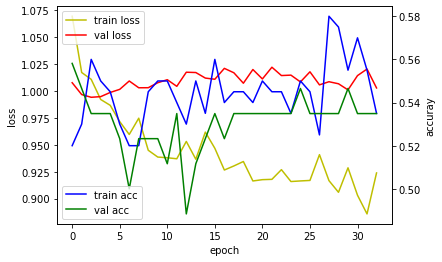

In [150]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [151]:
y_pred = model.predict(test_x)

In [152]:
print(y_pred)

[[0.06302699 0.5917855  0.3451875 ]
 [0.25858176 0.49178886 0.24962933]
 [0.08212775 0.73786706 0.18000512]
 [0.1540944  0.61542326 0.23048234]
 [0.2937651  0.37539923 0.3308356 ]
 [0.5793546  0.38736916 0.03327622]
 [0.48909578 0.46389118 0.04701298]
 [0.39050937 0.5199625  0.08952817]
 [0.33048373 0.45987856 0.20963761]
 [0.41838548 0.45199087 0.12962359]
 [0.1299128  0.5007373  0.36934993]
 [0.22932127 0.49720418 0.27347463]
 [0.07186753 0.5757916  0.35234082]
 [0.41838548 0.45199087 0.12962359]
 [0.29211298 0.47843415 0.22945292]
 [0.10943888 0.6881559  0.20240526]
 [0.3666369  0.4717077  0.16165541]
 [0.30449528 0.4567667  0.23873799]
 [0.09493655 0.65127754 0.25378588]
 [0.21609728 0.5096632  0.2742395 ]
 [0.22932127 0.49720418 0.27347463]
 [0.3666369  0.4717077  0.16165541]
 [0.09708893 0.5429779  0.35993314]
 [0.4118325  0.4657589  0.1224087 ]
 [0.13731074 0.5642594  0.29842988]
 [0.59085166 0.37909186 0.03005647]
 [0.17722663 0.54709846 0.27567488]
 [0.7021274  0.29085585 0.00

In [153]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [154]:
test_act = []
for i in range(len(test_y)):
    if test_y[i][1] == 1.0:
        test_act.append(0)
    elif test_y[i][2] == 1.0:
        test_act.append(1)
    else:
        test_act.append(2)

In [155]:
print(test_act)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1]


In [156]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
precision = precision_score(test_act, y_class, average= "macro")
print(precision)

0.2197377501725328


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
recall = recall_score(test_act, y_class, average= "macro")
print(recall)

0.34836601307189546


In [158]:
print(f1_score(test_act, y_class, average= "macro"))

0.1751187084520418
